<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EC%8B%AC%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%96%B4%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98%20%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/05.%EC%A0%95%EA%B7%9C%ED%99%94%EA%B0%80%20%EA%B3%BC%EB%8C%80%EC%A0%81%ED%95%A9%2C%20%EB%B6%84%EC%82%B0%20%ED%95%B4%EA%B2%B0%ED%95%98%EB%8A%94%20%EC%9D%B4%EC%9C%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***정규화가 Overfitting을 해결하고 분산을 줄이는 이유***

## $J(w,b)$ = Σ$\frac1 M$ $L$(y^, y) + [$\frac λ 2m$$||w^2 2||$]



> $\frac λ 2m$$||w^2 2||$ 괄호에 있는 것이 정규화 과정에서 추가된 항인데 이것은 가중치 행렬이 너무 커지는 것을 막기 위한 것! 

이것을 매개변수의 L2 노름 혹은 프로베니우스 노름이라고 부릅니다.

##왜 이 노름을 줄이는 것이 과대적합을 줄일 수 있을까요?

- 여기서 알 수 있는 것은 정규화에서 람다를 크게 만들어서 가중치 행렬 w를 0에 상당히 가깝게 설정할 수 있다는 것입니다.

- 그러면 많은 은닉 유닛을 0에 가까운 값으로 설정해서 은닉 유닛(가중치)의 영향력을 줄이면 훨씬 더 간단하고 작은 신경망이 됩니다.

즉 표현력이 줄어 과대적합이 이뤄지는 것을 막을 수 있습니다.

- 하지만 이것이 너무 심하게 되면 underfitting이 일어나기 때문에 적절한 값을 
찾는 것이 중요합니다.




---

과대적합이 발생하는 이유는 각 파라미터 변수들의 절댓값이 크게 설정되기 때문입니다.

파라미터 변수들의 절대값이 크게 설정되면 데이터를 따라가기 위해서 과하게 반응하게 됩니다. 

즉 이러한 현상을 보고 싶다면 러닝레이트를 0으로 설정하게 된다면 이 모습을 볼 수 있습니다. > 가중치 감쇠량 적을 때 생기는 원인이며 러닝레이트가 중요한 이유입니다.

---



파라미터 절대값이 크기에 과대적합이 발생하는 사실을 알았습니다. 이것을 해소시키기 위해서는 인위적으로 파라미터의 절대값을 감소시켜야 합니다.

비용함수에 L2노름을 추가하는 것입니다. 이렇게 하면 편도함수(미분할 때)를 구할 때 기존의 MSE 편도함수 뿐만아니라 알파와 해당 파라미터값을 곱한 값을 합하여 구하게 될 것입니다. 이는 곧 파라미터 갱신에 사용되므로 결과적으로 L2노름을 사용하지 않았을 때보다 파라미터의 절댓값 변화가 낮아지게되는 것입니다.

즉 가중치 갱신할 때 빼는 값이 더 커지므로 Overfitting을 방지해줍니다.

1. Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])
#result = array([[1.55071465]])

2. SGDRegressor

In [ ]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])
# resutl = array([1.49905184])

즉 간단하게 요약하면 overfitting이 발생하는 이유는 가중치 절대값이 너무 크기 때문이고 그것을 막을려면 가중치 값을 갱신할 때 빼주는 값 (손실함수의 편도함수)같은 값들을 크게해줘서 빼면 어느 정도 막을 수 있다

하지만 빼는 값을 너무 크게하면 underfitting이 일어나기 때문에 조심해야한다!

즉 우리가 학습률을 조절하는 것 과하게 할려고 하면 좀 덜하게하고 덜하게 되면 좀 더 시키게 하는 것!

러닝레이트를 올리거나 정규화를 통해 - 하는 값을 늘리면 됩니다.




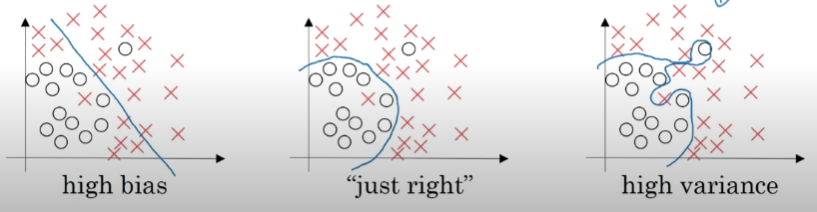

적절히 빼서 높은 분산을 없애주는 것 너무 많이 빼게되면 높은 편향을 갖게됨

가중치 학습량이 낮아서 그냥 직선처럼 데이터를 나눈다고 생각하면 됨!

L2노름을 사용할 경우 적절한 람다값을 찾는 것이 중요

람다값이 너무 크면 W값이 0에 가까워지면서 높은 편향을 갖게 됨 > 간단한 모델이 됨

이전에 활성화 값 분포를 늘리기 위해서 가중치에 0.01을 곱해준 것과 같은것!

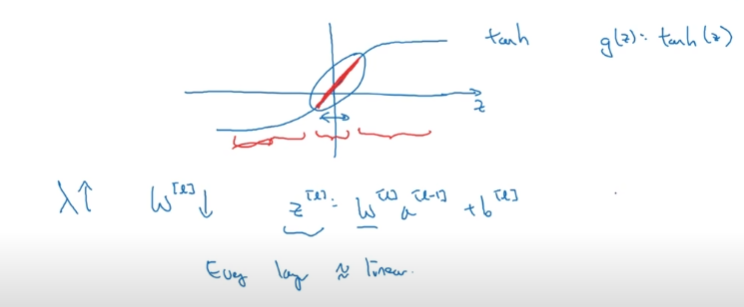

다음과 같이 tanh 함수가 있다고 할 때 

- tanh(z)
- z = wa + b

>람다 값을 조절해 w 값을 0에 가깝게 한다면 z도 0애 가까워지고 그러면 tanh의 일차 함수 구간과 가까워져서 선형 함수만을 계산할 수 있게 됨

> 비선형 구간을 못 사용한다는 의미 > 데이터를 복잡하게 나눌 수 없다

이러한 문제를 없앨려면 z값을 다양하게 분포시켜야 하나?

앤드류 응 교수님이 잘 사용하는 정규화 기법중 하나 = L2노름

정규화는 가중치 값을 조절하거나 입력 데이터 값을 조절해서 오버피팅 되는 것을 막아준다?